<h3>7.	Remember the puchases.txt file that we went over in class? It was also featured in the Udacity series. It’s 200 MB in size, and can be found within src/Hadoop/purchases-example/data. We finally work with this file, and perform several operations. 
</h3>
<h4>
Before we proceed, install the Hadoop-Hive Docker image, whose compose file can be found in the src/Docker directory. Just key in docker compose up -d at the command prompt, and babysit the download. Make sure that the container is properly running by checking out localhost:50070. Next, follow the instructions in the Hadoop slide deck to open up a bash shell inside the Docker container. 
</h4>

#a.	Push the purchases.txt file from the container’s file system into Hadoop – verify that you can see the file when you browse HDFS. How many blocks?

File is present on the HDFS and total 2 blocks, as HDFS created 128 MB blocks. So 200 is divided into 2. with 3 copies. As shown in the screenshot below
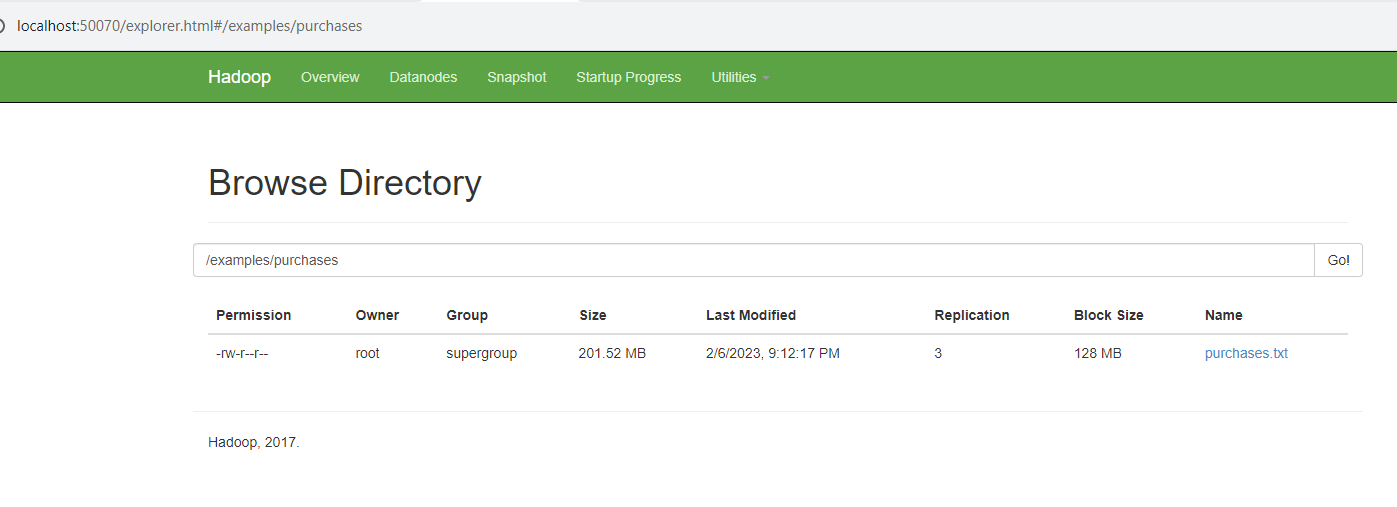

<h3>b.	Write a mapper and reducer in Python to aggregate sales by store location and date. Execute it, and read the results into a Pandas data frame.</h3>


In [1]:
import pyspark

from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
sc = SparkContext('local')
spark = SparkSession(sc)
spark

In [5]:
raw_purchases = spark.read \
                     .option("header", "false") \
                     .csv("data/purchases.txt", sep=r"\t")

In [6]:
raw_purchases.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [7]:
raw_purchases.take(5)

[Row(_c0='2012-01-01', _c1='09:00', _c2='San Jose', _c3="Men's Clothing", _c4='214.05', _c5='Amex'),
 Row(_c0='2012-01-01', _c1='09:00', _c2='Fort Worth', _c3="Women's Clothing", _c4='153.57', _c5='Visa'),
 Row(_c0='2012-01-01', _c1='09:00', _c2='San Diego', _c3='Music', _c4='66.08', _c5='Cash'),
 Row(_c0='2012-01-01', _c1='09:00', _c2='Pittsburgh', _c3='Pet Supplies', _c4='493.51', _c5='Discover'),
 Row(_c0='2012-01-01', _c1='09:00', _c2='Omaha', _c3="Children's Clothing", _c4='235.63', _c5='MasterCard')]

In [14]:
#connecting to Hive data
sc = SparkContext('local')
spark = SparkSession(sc)
raw_purchases = spark.read \
                     .option("header", "false") \
                     .csv("examples/purchases.txt", sep=r"\t")

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at /tmp/ipykernel_27806/2317982283.py:1 

In [11]:
purchases_records.printSchema()

root
 |-- 2012-01-01\t09:00\tSan Jose\tMen's Clothing\t214.05\tAmex: string (nullable = true)



In [12]:
purchases_records.take(5)

[Row(2012-01-01	09:00	San Jose	Men's Clothing	214.05	Amex="2012-01-01\t09:00\tFort Worth\tWomen's Clothing\t153.57\tVisa"),
 Row(2012-01-01	09:00	San Jose	Men's Clothing	214.05	Amex='2012-01-01\t09:00\tSan Diego\tMusic\t66.08\tCash'),
 Row(2012-01-01	09:00	San Jose	Men's Clothing	214.05	Amex='2012-01-01\t09:00\tPittsburgh\tPet Supplies\t493.51\tDiscover'),
 Row(2012-01-01	09:00	San Jose	Men's Clothing	214.05	Amex="2012-01-01\t09:00\tOmaha\tChildren's Clothing\t235.63\tMasterCard"),
 Row(2012-01-01	09:00	San Jose	Men's Clothing	214.05	Amex="2012-01-01\t09:00\tStockton\tMen's Clothing\t247.18\tMasterCard")]

In [8]:
#! pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 2.2 MB/s eta 0:00:0000:0100:01
